In [1]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

# CartPole

<img src="cartpole.png">

https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py
    
# Description:
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to
prevent it from falling over by increasing and reducing the cart's velocity.
# Source:
    This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
# Observation:
    Type: Box(4)
    Num     Observation               Min                     Max
    0       Cart Position             -4.8                    4.8
    1       Cart Velocity             -Inf                    Inf
    2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
    3       Pole Angular Velocity     -Inf                    Inf
# Actions:
    Type: Discrete(2)
    Num   Action
    0     Push cart to the left
    1     Push cart to the right
    Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
# Reward:
    Reward is 1 for every step taken, including the termination step
# Starting State:
    All observations are assigned a uniform random value in [-0.05..0.05]
# Episode Termination:
    - Pole Angle is more than 12 degrees.
    - Cart Position is more than 2.4 (center of the cart reaches the edge of the display).
    - Episode length is greater than 200.
    Solved Requirements:
    Considered solved when the average return is greater than or equal to
    195.0 over 100 consecutive trials.

In [10]:
# OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms.

# Agent are a single entity (the algorithm you are writing) that, through trial and error, 
# learn how to exploit their actions to gain reward.

# It sends actions to the environment, and the environment replies with observations (states)
# and rewards (that is, a score).

# The agent must have a policy/strategy (to select an action) and have a mechanism 
# to improve this strategy as it interacts more and more with the environment.


In [1]:
import gym

In [2]:
env = gym.make('CartPole-v0')  # CartPole-v0 only runs for 200 steps. CartPole-v1 runs for 500 steps.

<img src="gym_openai.png">

# Environment comes with an action_space and an observation_space :

These attributes are of type Space, and they describe the format of valid actions and observations.

The 'Discrete' space allows a fixed range of non-negative numbers.
- Discrete(2) -> in this case valid actions are either 0 or 1.
- Discrete(8) -> Set with 8 elements {0, 1, 2, ..., 7}

The 'Box' space represents an n-dimensional box.
- Box(4,) -> valid observations will be an array of 4 numbers (in that example, there is only one dimension).

In [3]:
# About action and observation space

# action_space
print("action space = {}".format(env.action_space)) # Discrete(2)
print("nb actions = {}".format(env.action_space.n)) # 2
# 0 Push cart to the left
# 1 Push cart to the right

for _ in range(3):
    # Randomly sample an element of this space => random(2) (just to test)
    print("a sample of action = {}".format(env.action_space.sample()))
    
# observation_space
# observation = x position of cart, x velocity of cart, angular position of pole, angular velocity of pole
print("observation space = {}".format(env.observation_space))
print("observation space shape = {}".format(env.observation_space.shape)) # (4,)

# We can also check the observation Box’s bounds
print("observation high = {}".format(env.observation_space.high))
print("observation low = {}".format(env.observation_space.low))

# Observation limits in details
print("x cart pos high = {}".format(env.observation_space.high[0])) # 4.8
print("x cart pos low = {}".format(env.observation_space.low[0])) # -4.8

print("x cart velocity high = {}".format(env.observation_space.high[1])) # Inf
print("x cart velocity low = {}".format(env.observation_space.low[1])) # -Inf

print("Angular pole pos high = {}".format(env.observation_space.high[2])) # 0.418 rad (~ 24 deg)
print("Angular pole pos low = {}".format(env.observation_space.low[2])) # -0.418 rad (~ -24 deg)

print("Angular pole velocity high = {}".format(env.observation_space.high[3])) # Inf
print("Angular pole velocity low = {}".format(env.observation_space.low[3])) # -Inf


action space = Discrete(2)
nb actions = 2
a sample of action = 1
a sample of action = 0
a sample of action = 0
observation space = Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
observation space shape = (4,)
observation high = [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
observation low = [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
x cart pos high = 4.800000190734863
x cart pos low = -4.800000190734863
x cart velocity high = 3.4028234663852886e+38
x cart velocity low = -3.4028234663852886e+38
Angular pole pos high = 0.41887903213500977
Angular pole pos low = -0.41887903213500977
Angular pole velocity high = 3.4028234663852886e+38
Angular pole velocity low = -3.4028234663852886e+38


# The 'step' function returns four values :

- observation (object): 
an environment-specific object representing your observation of the environment. 
For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.

- reward (float): 
amount of reward achieved by the previous action. 
The scale varies between environments, but the goal is always to increase your total reward.

- done (boolean): 
whether it’s time to reset the environment again. 
Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. 
(For example, perhaps the pole tipped too far, or you lost your last life.)

- info (dict): 
diagnostic information useful for debugging. 
It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). 
However, official evaluations of your agent are not allowed to use this for learning.


Example for CartPole : array([-0.00842369, -0.17244261, -0.0034994 ,  0.24360119]), 1.0, False, {}
    
    observation = array([x position of cart, x velocity of cart, angular position of pole, angular velocity of pole])
    reward = 1.0
    done = False
    info = {}
    
# The 'reset' function returns :

- observation (object): 
an environment-specific object representing your observation of the environment. 
For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.


# About 'done' :

- The environment will return done=True if either 200 timesteps have elapsed (episode success) 
or if the pole has fallen over (angular position of the pole has reached +- 12 degrees) 
or the cart has left the simulation space (cart position has reached +- 2.4), in which case the episode failed.

initial observation = [-0.03640544  0.02582775 -0.04168783 -0.01946892]


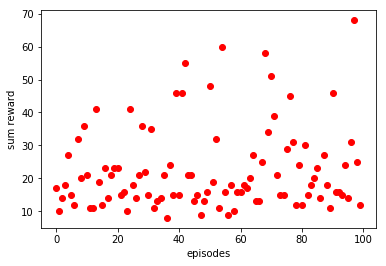

Average reward per episode : 22.56


In [8]:
# Example 1 :
# Selecting actions randomly
# Calulating reward per episode

from torch import randint
import matplotlib.pyplot as plt
import numpy as np

# Just to test initial observation
initial_obs = env.reset() # reset environment
print("initial observation = {}".format(initial_obs))

reward_array = []
episode_count = 100

plt.xlabel('episodes')
plt.ylabel('sum reward')

for i in range(episode_count):
    # obs = reset initial obs, done = False, sum_reward per episode = 0
    obs, done, sum_reward = env.reset(), False, 0
    
    while (done != True) :
        # Tensor A size : torch.Size([1])
        A =  randint(0,env.action_space.n,(1,))  # get a random action from 0 (inclusive) to 2 (exclusive)
        
        #env.render() # will open a GUI window and show you the cartpole.
        
        obs, reward, done, info = env.step(A.item()) # apply the random action to the environment
        sum_reward += reward
        
    reward_array.append(sum_reward) # add sum_reward to reward array
    
env.close() # close environment

t = np.arange(0, episode_count, 1)
plt.plot(t,reward_array,'ro') # plot with pyplot function the reward array
plt.show()

print("Average reward per episode :",sum(reward_array)/ len(reward_array))

In [5]:
# The Solution that take a random action is very bad.
# In that case, there is 100 episodes and each episode has a cumulated reward between 21 and 23,
# (Reward is 1 for every step taken, including the termination step)
# The environment will return done=True if either 200 timesteps have elapsed (episode success)
# or if the pole has fallen over (angular position of the pole has reached +- 12 degrees) 
# or the cart has left the simulation space (cart position has reached +- 2.4), in which case the episode failed.

# The objective now is to define a policy which allows us to receive 200 rewards per episode.
# By using reinforcement learning techniques such as the DQN algorithm.

# Pay attention : while DQN solves problems with high-dimensional observation spaces, 
# it can only handle discrete and low-dimensional action spaces

In [ ]:
# DQN algorithm represent a policy via a Deep Neural Network (DNN).

# This DNN will look at the given observation and will tell us which action is best to take in the current state.
# A kind of function approximator.
# In fact, the network takes a state(‘s) as the input and produces the Q-values for every action in the action space.
# Then we just have to take the max Q-value to take the corresponding action in the environment.
# best_action = arg max(DNN predicted Q-values ).

# We can evaluate and correct the DNN by using any loss function (Mean Squared Error) 
# between predicted and target returns.

# Since we don’t know the “target” as it’s a reinforcement learning 
# (not supervised so no labels) so we have to estimate it : target = R + γ max A` Q(S`, A`)
# We get the reward R and Next state S` when we perform an action in the environment.
# R → the current immediate reward
# S` → Next state
# max A` Q(S`, A`) → max("target DNN" output list of Q-values for the next state)
# γ → the discount factor γ → {0,1}
# To calculate Q(S`, A`)  we maintain another network we call the "target network", 
# and we assign the "actual network" weights to the "target network" for every N iterations.
# The reason for this is we update the actual network gradients for every frame/action 
# so the network keeps on changing so it’s not feasible to use the same network for 
# calculating the actual reward.

# Later, with this loss information, we can use Gradient Descent to optimize 
# the weights of the DNN to minimize this loss. 
# (update it’s gradients using backprop to converge)

# Training such a network requires a lot of data, but even then, it is not guaranteed 
# to converge on the optimal value function. 
# In fact, there are situations where the network weights can oscillate or diverge, 
# due to the high correlation between actions and states.
# In order to solve this, we need two techniques : Experience Replay and Target Network

# Experience Replay :
# -----------------
# We can prevent action values from oscillating or diverging catastrophically using
# a large buffer of our past experience and sample training data from it, 
# instead of using our latest experience. 
# This technique is called replay buffer or experience buffer. 
# The replay buffer contains a collection of experience tuples (S, A, R, S′).
# The act of sampling a small batch of tuples from the replay buffer in order 
# to learn is known as experience replay.
# (using a random subset of these experiences to update the Q-network, 
# rather than using just the single most recent experience, 
# which also allows us to break the correlation between subsequent steps in the environment)

# Target Network :
# --------------
# The Bellman equation provides us with the value of Q(s, a) via Q(s’, a’). (s' = next state) 
# However, both the states s and s’ have only one step between them.
# When we perform an update of our Neural Networks’ parameters to make Q(s, a) closer 
# to the desired result, we can indirectly alter the value produced for Q(s’, a’) 
# and other states nearby. This can make our training very unstable.
# To make training more stable, we use a second Q-network called "target network", 
# by which we keep a copy of our neural network and use it for the Q(s’, a’) value 
# in the Bellman equation.
# The predicted Q values of this second Q-network called the target network, 
# are used to backpropagate through and train the main Q-network. 
# The target network’s parameters are not trained, but they are periodically synchronized 
# with the parameters of the main Q-network.

In [4]:
# Reference :
# https://blog.gofynd.com/building-a-deep-q-network-in-pytorch-fa1086aa5435
# https://github.com/mahakal001/reinforcement-learning

import torch
from torch import nn
import copy
from collections import deque
import random

class DQN_Agent:

    # Constructor of the class
    def __init__(self, seed, layer_sizes, lr, sync_freq, exp_replay_size):
        torch.manual_seed(seed) # set torch seed value
        self.q_net = self.build_nn(layer_sizes) # create Q main network
        self.target_net = copy.deepcopy(self.q_net) # create Q target network with a copy of Q main.
        self.q_net.cuda() # use cuda device
        self.target_net.cuda() # use cuda device
        self.loss_fn = torch.nn.MSELoss() # use loss function : mean squared error (squared L2 norm)
        self.optimizer = torch.optim.Adam(self.q_net.parameters(), lr=lr) # use Adam optimizer on the Q main net parameters.

        self.network_sync_freq = sync_freq # set frequency of synchro between Q main and Q target net.
        self.network_sync_counter = 0
        self.gamma = torch.tensor(0.95).float().cuda() # set discount factor value for the futur rewards.
        self.experience_replay = deque(maxlen=exp_replay_size) # create a replay buffer.
        return
    
    # Build the Q main net :
    # Sequential(
    #  (0): Linear(in_features=4, out_features=64, bias=True)
    #  (1): Tanh()
    #  (2): Linear(in_features=64, out_features=2, bias=True)
    #  (3): Identity()
    # )
    def build_nn(self, layer_sizes):
        assert len(layer_sizes) > 1
        layers = []
        for index in range(len(layer_sizes) - 1):
            linear = nn.Linear(layer_sizes[index], layer_sizes[index + 1])
            act = nn.Tanh() if index < len(layer_sizes) - 2 else nn.Identity()
            layers += (linear, act)
        return nn.Sequential(*layers)

    # Load q main net parameters from a file named "cartpole-dqn.pth
    def load_pretrained_model(self, model_path):
        self.q_net.load_state_dict(torch.load(model_path))

    # Save parameters of q main net to a file named "cartpole-dqn.pth"
    def save_trained_model(self, model_path="cartpole-dqn.pth"):
        torch.save(self.q_net.state_dict(), model_path)

    # From a state, give me an action (0 or 1)
    # Example : tensor([0])
    def get_action(self, state, action_space_len, epsilon):
        # We do not require gradient at this point, because this function will be used either
        # during experience collection or during inference 
        with torch.no_grad():
            Qp = self.q_net(torch.from_numpy(state).float().cuda()) # forward state in q main net and get Q values (2 values).
        
        # Q = max value of 2 Q Values (Qp), A = index of the max (0 or 1)
        Q, A = torch.max(Qp, axis=0) 
        
        # We can either choose the action corresponding to maximum Q-value(exploitation) 
        # or with a small probability, epsilon, a random action can be selected(exploration)
        A = A if torch.rand(1, ).item() > epsilon else torch.randint(0, action_space_len, (1,))
        
        # A is a Tensor with 1 value (0 or 1) = Action
        return A

    # get Q value (the max) of next state by using Q target net.
    # state is a tensor that can contain a batch of 4 values
    def get_q_next(self, state):
        with torch.no_grad():
            qp = self.target_net(state)
        q, _ = torch.max(qp, axis=1)
        return q

    # Add a new experience into replay buffer
    # Example : send 1 as step to the env (Push cart to the right)
    # obs = env.reset()
    # obs_next, reward, done, _ = env.step(1)
    # experience = [obs, 1, reward, obs_next]
    # -> experience is a list of 4 elements [obs, action, reward, next obs]
    def collect_experience(self, experience):
        self.experience_replay.append(experience)
        return

    # Extract a sample of size sample_size from replay buffer
    # For example : 
    # sample_from_experience(2) give :
    # ( tensor([[ 0.0382,  0.0329, -0.0285, -0.0199],[-0.0285, -0.0212, -0.0015, -0.0407]]),
    # tensor([0., 0.]), tensor([1., 1.]),
    # tensor([[ 0.0389, -0.1618, -0.0289,  0.2637],[-0.0289, -0.2163, -0.0023,  0.2515]]) )
    # A tuple composed with a tensor of 2 obs/states, a tensor of 2 actions,
    # a tensor of 2 rewards, a tensor of 2 next obs/states
    def sample_from_experience(self, sample_size):
        if len(self.experience_replay) < sample_size:
            sample_size = len(self.experience_replay)
            
        # returns a random sample_size length list of items (experiences) chosen from the replay buffer
        sample = random.sample(self.experience_replay, sample_size)
        
        # Each exp is a list -> [obs, action, reward, next obs]
        s = torch.tensor([exp[0] for exp in sample]).float() # create a tensor of states
        a = torch.tensor([exp[1] for exp in sample]).float() # create a tensor of actions
        rn = torch.tensor([exp[2] for exp in sample]).float() # create a tensor of rewards
        sn = torch.tensor([exp[3] for exp in sample]).float() # create a tensor of next states
        return s, a, rn, sn
    
    # train Q main network with a batch of sample replay buffer
    def train(self, batch_size):
        s, a, rn, sn = self.sample_from_experience(sample_size=batch_size)
        if self.network_sync_counter == self.network_sync_freq:
            self.target_net.load_state_dict(self.q_net.state_dict())
            self.network_sync_counter = 0

        # predict expected return of current state using main network
        qp = self.q_net(s.cuda()) # s is a Tensor 
        pred_return, _ = torch.max(qp, axis=1)

        # get target return using target network
        q_next = self.get_q_next(sn.cuda())
        target_return = rn.cuda() + self.gamma * q_next

        loss = self.loss_fn(pred_return, target_return)
        self.optimizer.zero_grad()
        loss.backward(retain_graph=True)
        self.optimizer.step()

        self.network_sync_counter += 1
        return loss.item()

In [5]:
# Reference :
# https://blog.gofynd.com/building-a-deep-q-network-in-pytorch-fa1086aa5435
# https://github.com/mahakal001/reinforcement-learning

# Create a DQN Agent

input_dim = env.observation_space.shape[0]  # 4 => Cart Position, Cart Velocity, Pole Angle, Pole Angular Velocity
output_dim = env.action_space.n # 2 => Push cart to the left, Push cart to the right

exp_replay_size = 256 # size ot the replay buffer

agent = DQN_Agent(seed=1423, layer_sizes=[input_dim, 64, output_dim], lr=1e-3, sync_freq=5,
                  exp_replay_size=exp_replay_size) 

# learning rate = 1e-3
# Deep learning neural networks are trained using the stochastic gradient descent algorithm.
# The amount that the weights are updated during training is referred to as the step size 
# or the “learning rate.”
# Smaller learning rates require more training epochs given the smaller changes made 
# to the weights each update, whereas larger learning rates result in rapid changes 
# and require fewer training epochs.
# A learning rate that is too large can cause the model to converge too quickly 
# to a suboptimal solution, whereas a learning rate that is too small can cause 
# the process to get stuck

# seed=1423
# It will set the seed of the random number generator to a fixed value, 
# the results will be reproducible.

# sync_freq=5
# Every 5 counts, the target network (self.target_net) will be synchronized with 
# the q main network ( self.q_net).

# layer_sizes=[input_dim, 64, output_dim] -> [4, 64, 2]
# The Q "main network" will be like this :
# Sequential(
#  (0): Linear(in_features=4, out_features=64, bias=True)
#  (1): Tanh()
#  (2): Linear(in_features=64, out_features=2, bias=True)
#  (3): Identity()
# )

In [12]:
# Reference :
# https://blog.gofynd.com/building-a-deep-q-network-in-pytorch-fa1086aa5435
# https://github.com/mahakal001/reinforcement-learning

# Main training loop

from tqdm import tqdm
# tqdm : pip install tqdm
# Usefull to show a progress bar
# https://tqdm.github.io/

losses_list, reward_list, episode_len_list, epsilon_list = [], [], [], []
episodes = 10000
epsilon = 1

# initiliaze experience replay
index = 0
for i in range(exp_replay_size):
    obs = env.reset()
    done = False
    while not done:
        A = agent.get_action(obs, env.action_space.n, epsilon=1)
        obs_next, reward, done, _ = env.step(A.item())
        agent.collect_experience([obs, A.item(), reward, obs_next])
        obs = obs_next
        index += 1
        if index > exp_replay_size:
            break


index = 128
for i in tqdm(range(episodes)):
    obs, done, losses, ep_len, rew = env.reset(), False, 0, 0, 0
    while not done:
        ep_len += 1
        A = agent.get_action(obs, env.action_space.n, epsilon)
        obs_next, reward, done, _ = env.step(A.item())
        agent.collect_experience([obs, A.item(), reward, obs_next])

        obs = obs_next
        rew += reward
        index += 1

        if index > 128:
            index = 0
            for j in range(4):
                loss = agent.train(batch_size=16)
                losses += loss
    if epsilon > 0.05:
        epsilon -= (1 / 5000)

    losses_list.append(losses / ep_len), reward_list.append(rew)
    episode_len_list.append(ep_len), epsilon_list.append(epsilon)

print("Saving trained model")
agent.save_trained_model("cartpole-dqn.pth")

100%|██████████| 10000/10000 [04:15<00:00, 39.17it/s]

Saving trained model


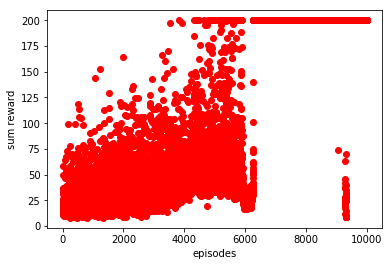

In [17]:
# Plot sum reward per episode after training

plt.xlabel('episodes')
plt.ylabel('sum reward')

t = np.arange(0, episodes, 1)
plt.plot(t,reward_list,'ro')
plt.show()



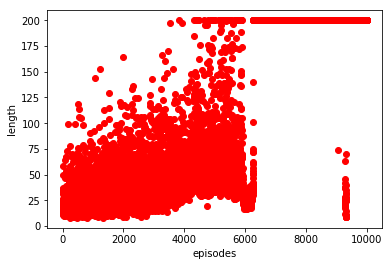

In [18]:
# Plot length of episodes after training

plt.xlabel('episodes')
plt.ylabel('length')

t = np.arange(0, episodes, 1)
plt.plot(t,episode_len_list,'ro')
plt.show()

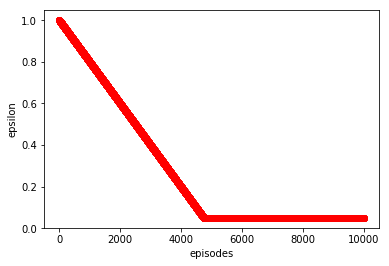

In [19]:
# Plot epsilon per episode after training

plt.xlabel('episodes')
plt.ylabel('epsilon')

t = np.arange(0, episodes, 1)
plt.plot(t,epsilon_list,'ro')
plt.show()

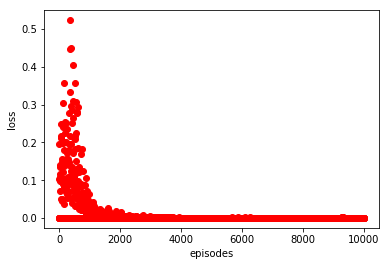

In [20]:
# Plot loss per episode after training

plt.xlabel('episodes')
plt.ylabel('loss')

t = np.arange(0, episodes, 1)
plt.plot(t,losses_list,'ro')
plt.show()

100%|██████████| 100/100 [05:30<00:00,  3.31s/it]

average reward per episode : 200.0


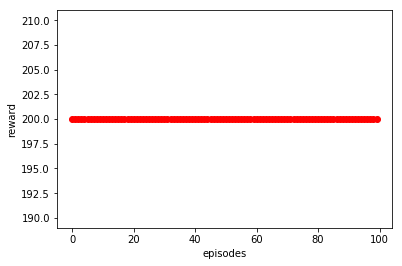

In [23]:
# Reference :
# https://blog.gofynd.com/building-a-deep-q-network-in-pytorch-fa1086aa5435
# https://github.com/mahakal001/reinforcement-learning

# Use trained model

from time import sleep

agent.load_pretrained_model("cartpole-dqn.pth")

reward_arr = []
for i in tqdm(range(100)):
    obs, done, rew = env.reset(), False, 0
    while not done:
        A = agent.get_action(obs, env.action_space.n, epsilon=0)
        obs, reward, done, info = env.step(A.item())
        rew += reward
        sleep(0.01)
        env.render()

    reward_arr.append(rew)

print("average reward per episode :", sum(reward_arr) / len(reward_arr))

plt.xlabel('episodes')
plt.ylabel('reward')

t = np.arange(0, 100, 1)
plt.plot(t,reward_arr,'ro')
plt.show()

In [44]:
# JUST TO REMINDER ABOUT TENSOR BATCH SIZE FORWARD INTO A NET
# NECESSARY TO UNDERSTAND TRAINING CODE

input_size = 2
output_size = 4
batch_size = 3

net = nn.Linear(input_size, output_size)
print("network structure : {}".format(net))

input = torch.FloatTensor(batch_size, input_size)
print("Input [{} lines of {} elements] : {}".format(batch_size, input_size,input))

print("Input size :", input.size())

output = net(input) # forward a tensor input as a batch (3) of 8 values to the net

print("Ouput [{} lines of {} elements] : {}".format(batch_size, output_size, output))
print("Output size :", output.size())

print("=======================================")
gamma = 0.3
target = output * 0.3
print("output * gamma = ", output)


network structure : Linear(in_features=2, out_features=4, bias=True)
Input [3 lines of 2 elements] : tensor([[109.6583,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
Input size : torch.Size([3, 2])
Ouput [3 lines of 4 elements] : tensor([[-45.9299, -28.9092, -58.7221,  34.2017],
        [  0.1443,  -0.3174,   0.3886,   0.1911],
        [  0.1443,  -0.3174,   0.3886,   0.1911]], grad_fn=<AddmmBackward>)
Output size : torch.Size([3, 4])
output * gamma =  tensor([[-45.9299, -28.9092, -58.7221,  34.2017],
        [  0.1443,  -0.3174,   0.3886,   0.1911],
        [  0.1443,  -0.3174,   0.3886,   0.1911]], grad_fn=<AddmmBackward>)


In [ ]:
# JUST TO TEST SOME PART OF TRAIN CODE

In [45]:
obs = env.reset()
A = agent.get_action(obs, env.action_space.n, epsilon=1)
print(A)

tensor([1])


In [46]:
# Collect experience into a replay buffer

index = 0
for i in range(exp_replay_size):
    obs = env.reset()
    done = False
    while not done:
        A = agent.get_action(obs, env.action_space.n, epsilon=1)
        obs_next, reward, done, _ = env.step(A.item())
        agent.collect_experience([obs, A.item(), reward, obs_next])
        obs = obs_next
        index += 1
        if index > exp_replay_size:
            break
    

In [47]:
# Extract a sample (size = 2) from replay buffer (experience)
s, a, rn, sn = agent.sample_from_experience(sample_size=2)
print("s :",s)
print("a :",a)
print("rn :",rn)
print("sn :",sn)

s : tensor([[ 0.0421, -0.0289,  0.0422,  0.0353],
        [ 0.0112, -0.0133,  0.0368, -0.0196]])
a : tensor([0., 0.])
rn : tensor([1., 1.])
sn : tensor([[ 0.0415, -0.2246,  0.0429,  0.3410],
        [ 0.0109, -0.2089,  0.0364,  0.2845]])


In [48]:
qp = agent.q_net(s.cuda()) # forward the tensor s to the net
# the net has an input of 4 values, and the tensor s has a batch (2) of 4 values
# so the forward is batched, and we obtain in output (normally 2 values) a tensor with 
# a batch (2) of 2 values.
print("qp :", qp)

qp : tensor([[ 0.1317, -0.1038],
        [ 0.1342, -0.1361]], device='cuda:0', grad_fn=<AddmmBackward>)


In [49]:
val, index = torch.max(qp, axis=1) # max of qp for each lines (axis=1)
print("val :", val) # get max of each batch
print("index :", index)

val : tensor([0.1317, 0.1342], device='cuda:0', grad_fn=<MaxBackward0>)
index : tensor([0, 0], device='cuda:0')


In [51]:
val, index = torch.max(qp, axis=0) # max of qp for each columns (axis=0)
print("val :", val)
print("index :", index)

val : tensor([ 0.1342, -0.1038], device='cuda:0', grad_fn=<MaxBackward0>)
index : tensor([1, 0], device='cuda:0')


In [52]:
# sn (state/obs next) is a tensor with a batch (2) of 4 values
qp = agent.target_net(sn.cuda()) # qp is a tensor with a batch (2) of 2 values (QValues)
print("qp :", qp)

qp : tensor([[0.1405, 0.0666],
        [0.1437, 0.0339]], device='cuda:0', grad_fn=<AddmmBackward>)


In [53]:
q_next, q_next_index = torch.max(qp, axis=1) # Get max Qvalue of each batch
# q_next is a tensor batch (2) of 1 value 
print("val :", q_next)
print("index :", q_next_index)

val : tensor([0.1405, 0.1437], device='cuda:0', grad_fn=<MaxBackward0>)
index : tensor([0, 0], device='cuda:0')


In [54]:
# rn (reward) is a tensor batch (2) of 1 value, q_next is a tensor batch (2) of 1 value
# so target_return is also a tensor batch (2) of 1 value
target_return = rn.cuda() + agent.gamma * q_next
print("target_return :", target_return)

target_return : tensor([1.1335, 1.1365], device='cuda:0', grad_fn=<AddBackward0>)
